# Benguluru House pricing prediction

In [1]:
# import liberies 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv") #read csv file
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape #rows,columns

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count') #upending the count do dataset for each of this datasets(area_type)

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2 =df1.drop(['area_type', 'society', 'balcony', 'availability'], axis = 'columns') #droping down the data set to limited specifications(size,price,bath.etc)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df2.isnull().sum() #counting null values in data set 

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df3 = df2.dropna()#droping the null values from dataset
df3.isnull().sum()# no null values left

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3.shape#no. of rows and columns after removing null values

(13246, 5)

In [9]:
df3['size'].unique()#gives unique values from 'size' column data

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
#Creating the new column based on size column, by using the string and tokenise it using lambda function

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df3.head()#BHK columne is created

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
df3['BHK'].unique()#gives values of BHK column

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [13]:
df3[df3.BHK>20]#get info about bedroom more than 20

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [14]:
df3.total_sqft.unique()#geting values from 'total_sqft'

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
#Defined a function to arange data in the form of range
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df3[~df3['total_sqft'].apply(is_float)].head(10)#give not valid float values which is not true. ~(negate) returns data frame back, in ranges(2100 - 2850,3067 - 8156)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [17]:
#Defined a function taking range as an input and returns the average value

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
convert_sqft_to_num('2100 - 2850')#return the average of range in form of float

2475.0

In [19]:
convert_sqft_to_num('34.46Sq. Meter')# returns nothing

In [20]:
df4 = df3.copy()# df4 is a copy of df3 data frame
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(6)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2


In [21]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
BHK                   4
Name: 30, dtype: object

# Real Estate Price Prediction

In [22]:
df4.head(6)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2


In [23]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']#adding new cloumn 'price_per_sqft' which is a division of two column 'pricr' and 'total_sqft'
df5.head(6)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248


In [24]:
len(df5.location.unique())#Length of location values

1304

In [25]:
df5.location = df5.location.apply(lambda x: x.strip())#remove's blank spacing from the location  data

location_stats = df5.groupby('location')['location'].agg('count')# Location column withs its count
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [26]:
df5.location = df5.location.apply(lambda x: x.strip())
#sorted acording to max no. of data points
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats.head(10)

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
Yelahanka                210
Uttarahalli              186
Hebbal                   176
Marathahalli             175
Raja Rajeshwari Nagar    171
Name: location, dtype: int64

In [27]:
# Locations less than ten data poits
len(location_stats[location_stats<=10])

1052

In [28]:
# let see less than 10 data points
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [29]:
len(df5.location.unique())

1293

In [30]:
#Transformation 

df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
#location is other if x in location stats is less than 10 else location can keep value

len(df5.location.unique())

242

# Removing Outliers

In [31]:
df5.head(11)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [32]:
# Finding outliers 
df5[df5.total_sqft/df5.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [33]:
df5.shape

(13246, 7)

In [34]:
df6 = df5[~(df5.total_sqft/df5.BHK<300)] #To fliter rows we do negate
df6.shape

(12502, 7)

In [35]:
df6.price_per_sqft.describe()#describe gives basic statistics on a perticular column

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [36]:
def remove_pps_outliers(df):# Data frame as input
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):#Grouping by location
        m = np.mean(subdf.price_per_sqft)# Per location get sub data frame'subdf'
        st = np.std(subdf.price_per_sqft)# For which calculating mean'm' and standard deviation 'st'
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]# Filtering data points which are beyond standard deviation, means any thing above'm-st' and any thing below 'm+st' will be kept in 'reduced_df'
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)#will append the data fram till all outliers removed
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

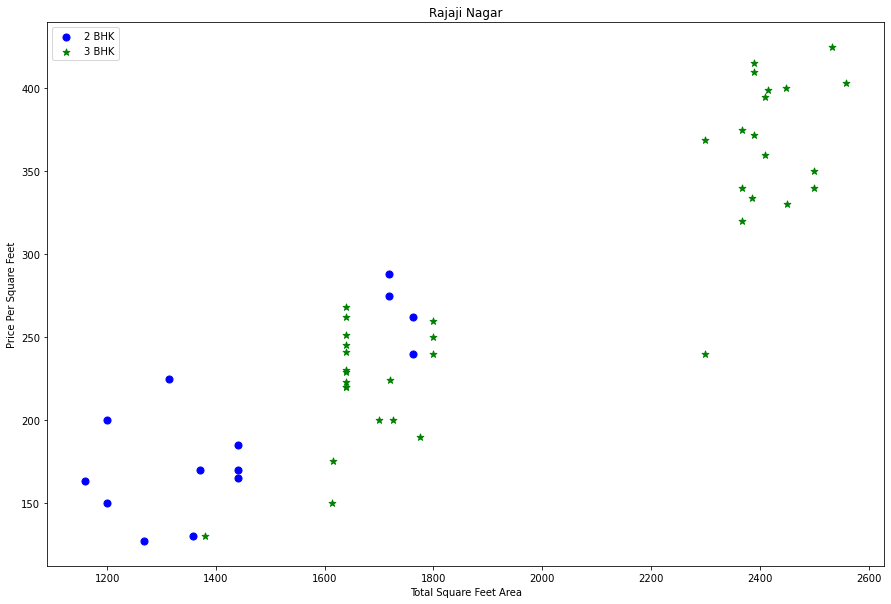

In [37]:
#Scatter plot
def plot_scatter_chart(df,location):
    BHK2 = df[(df.location==location) & (df.BHK==2)]# creates data frame for 2BHK
    BHK3 = df[(df.location==location) & (df.BHK==3)]# creates data frame for 3BHK
    matplotlib.rcParams['figure.figsize'] = (15,10)
    
    #Plot's the sactter plot
    plt.scatter(BHK2.total_sqft, BHK2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(BHK3.total_sqft, BHK3.price, marker='*', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7, "Rajaji Nagar")

In [38]:
def remove_BHK_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'): #Location grouped for every location data frame 
        BHK_stats={}
        for BHK, BHK_df in location_df.groupby('BHK'):#Creating new data frame based on BHK
            BHK_stats[BHK] = {
                'mean':np.mean(BHK_df.price_per_sqft),# for BHK data frame computing mean,st and count
                'std': np.std(BHK_df.price_per_sqft),
                'count': BHK_df.shape[0]
            }#exit of for loop
            
# creating another for loop to exclude data points whose price oer sqft is less than the mean of the previous BHK
        for BHK, BHK_df in location_df.groupby('BHK'):
            stats = BHK_stats.get(BHK-1)
            if stats and stats ['count']>5:
                exclude_indices = np.append(exclude_indices, BHK_df[BHK_df.price_per_sqft<(stats['mean'])].index.values)
            return df.drop(exclude_indices,axis='index')
        
df8 = remove_BHK_outliers(df7)
df8.shape

(10241, 7)

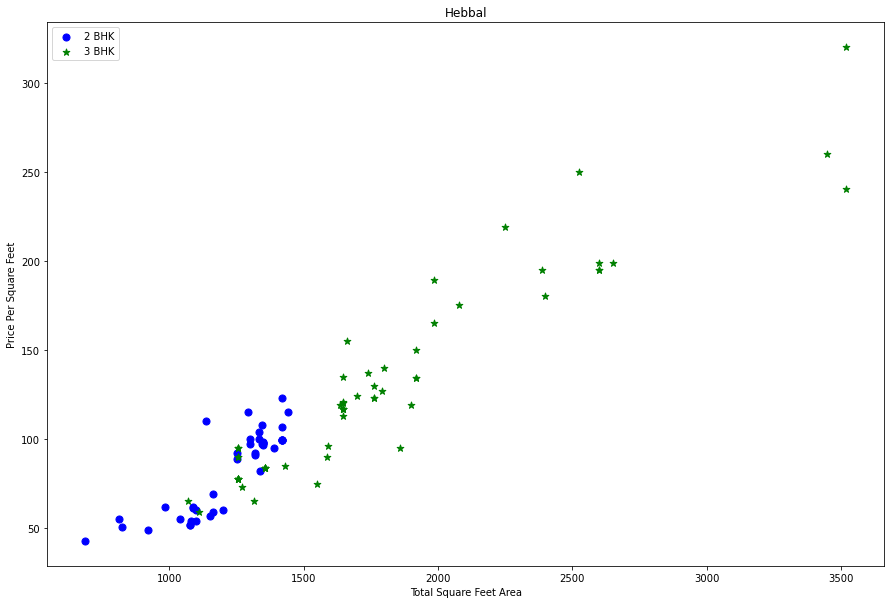

In [39]:
plot_scatter_chart(df8, "Hebbal")

Text(0, 0.5, 'Count')

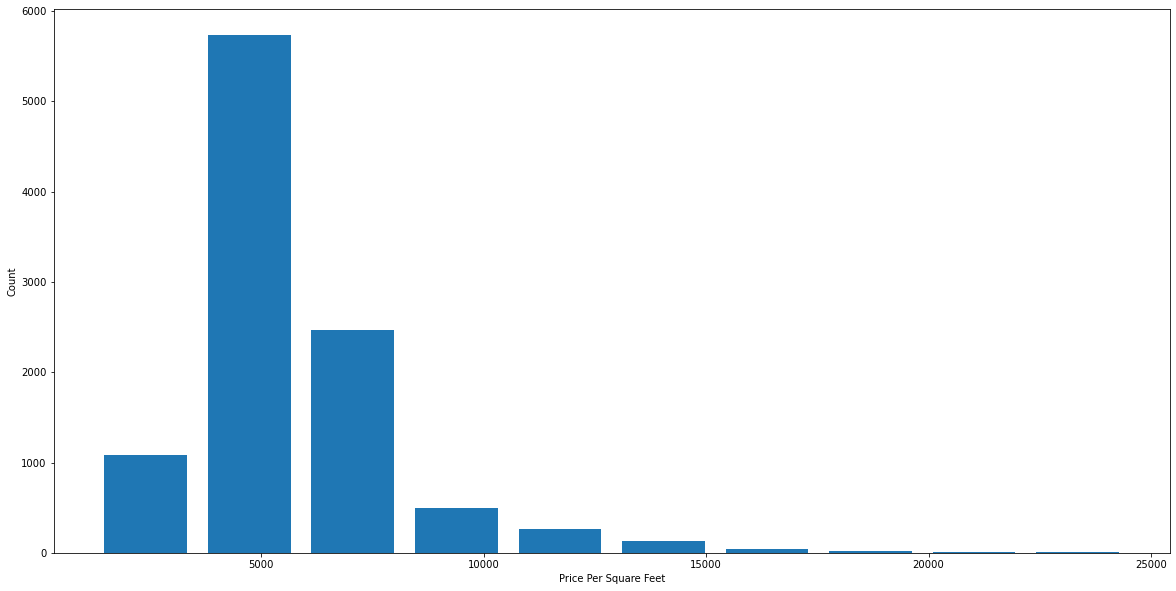

In [40]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [41]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [42]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

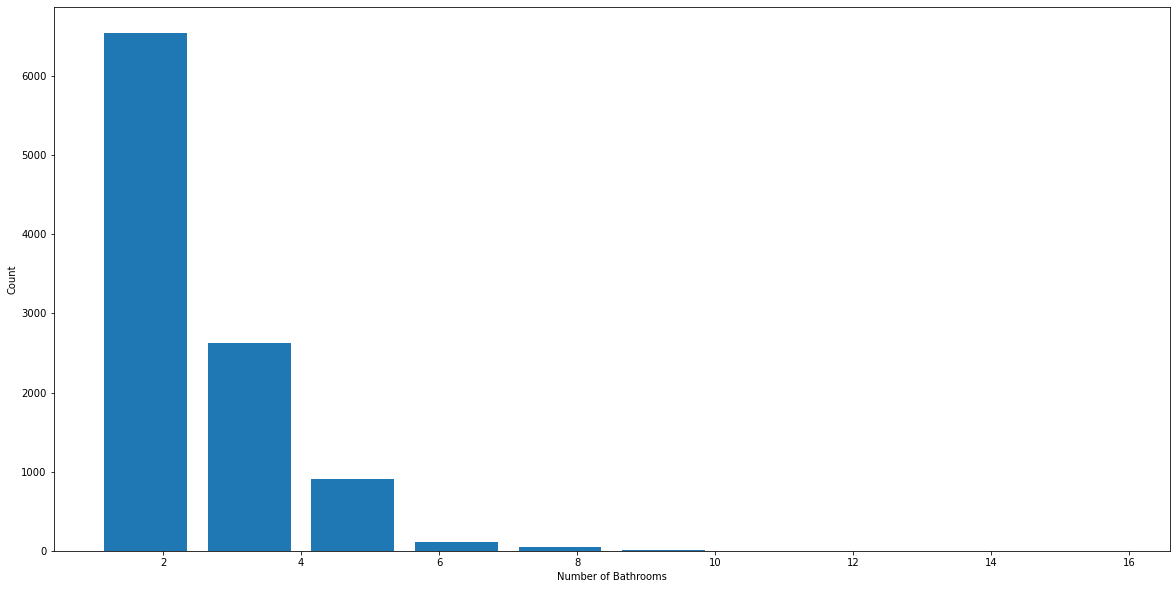

In [43]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [44]:
df8[df8.bath>df8.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [45]:
df9 = df8[df8.bath<df8.BHK+2]
df9.shape

(10147, 7)

In [46]:
df9.head(11)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163
7,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,8849.557522
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
9,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667


# Model Building 

In [47]:
df10 = df9.drop(['size', 'price_per_sqft'], axis='columns')
df10.head(6)

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,413.0,4


In [48]:
dummies = pd.get_dummies(df10.location)
dummies.head(6)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df11 = pd.concat([df10, dummies.drop('other', axis='columns')],axis='columns')
df11.head(6)

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Block Jayanagar,2750.0,4.0,413.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df12 = df11.drop('location', axis='columns')
df12.head(6)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,413.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df12.shape

(10147, 245)

In [52]:
x = df12.drop('price', axis='columns')
x.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [58]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.7919477337586318

In [59]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.81155684, 0.77261421, 0.80214981, 0.80426801, 0.79827292])

In [64]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression': {
            'model':LinearRegression(),
            'params': {
                'normalize':[True, False]
            }
        },
        
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friendman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score= False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    return pd.DataFrame(scores,columns=['model','best_score', 'best_params'])

find_best_model_using_gridsearchcv(x,y)

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 1251, in fit
    X_idx_sorted=X_idx_sorted)
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 350, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'friendman_mse'

  FitFailedWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

,model,best_score,best_params
0,linear_regression,0.797772,{'normalize': True}
1,lasso,0.665247,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.695573,"{'criterion': 'mse', 'splitter': 'best'}"


In [65]:
x.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [67]:
np.where(x.columns=='2nd Phase Judicial Layout')[0][0]

5

In [76]:
def predict_price(location, sqft, bath, BHK):
    loc_index = np.where(x.columns==location)[0][0]
    
    z = np.zeros(len(x.columns))
    z[0] = sqft
    z[1] = bath
    z[2] = BHK
    if loc_index >= 0:
        z[loc_index] = 1
    
    return lr_clf.predict([z])[0]

In [77]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

86.33120168561922

In [78]:
predict_price('1st Phase JP Nagar', 1000, 3, 3)

87.88509324031345

In [79]:
predict_price('Indira Nagar', 1000, 2, 2)

168.6175952187068

In [80]:
predict_price('Indira Nagar', 1000, 3, 3)

170.17148677340106

In [82]:
import pickle
with open('Bengaluru_House_data', 'wb') as f:
    pickle.dump(lr_clf,f)

In [84]:
import json
columns = {
    'data_columns': [col.lower() for col in x.columns]
}
with open("columns.jason","w") as f:
    f.write(json.dumps(columns))